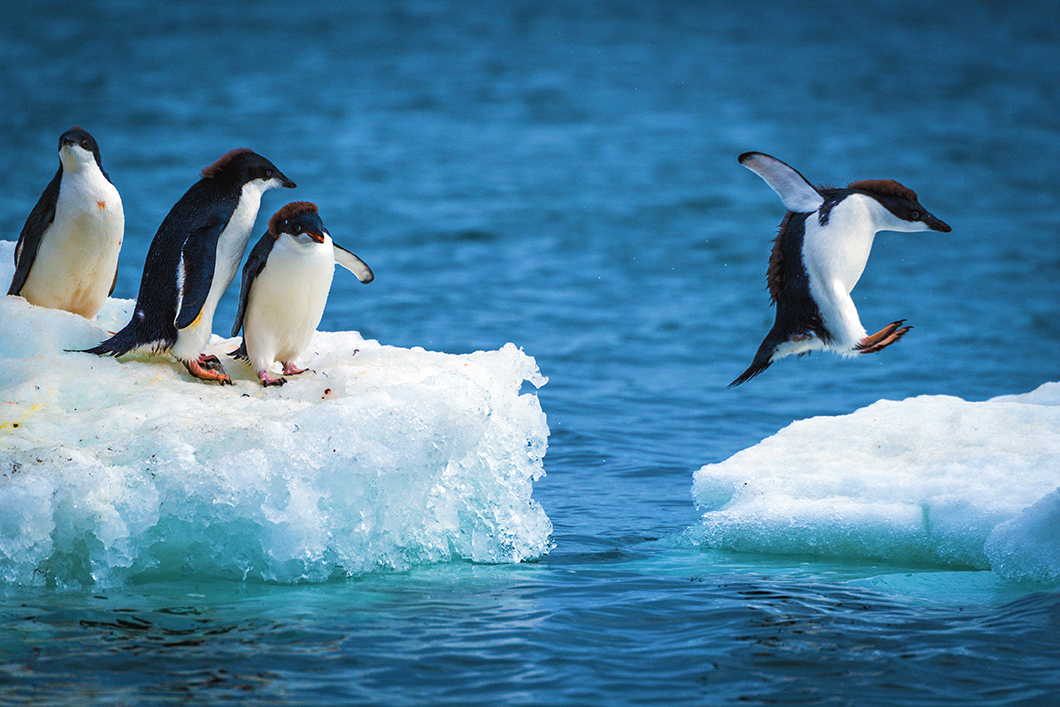

# Capstone Project: Penguins

Data analysis and machine learning with Python!

Wraps up Udemy course from Jose Portilla: Python for Data Science and Machine Learning Bootcamp

**March 4-7, 2023**

Garrett Becker

____
____
## Part 3: Decision Trees and Random Forests
____
____

____
## Imports and Setup
____

** Import modules **

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

** Import data **

In [17]:
df = pd.read_csv('penguins.csv')

In [18]:
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


** Fix NaN values **

In [19]:
df[df.isna().any(axis=1)]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


** Fill in the average of numerical columns for NaN **

In [20]:
df['bill_length_mm'].fillna(value=df['bill_length_mm'].mean(), inplace=True)
df['bill_depth_mm'].fillna(value=df['bill_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(value=df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(value=df['body_mass_g'].mean(), inplace=True)

In [21]:
df[df.isna().any(axis=1)]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007
8,9,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,NaN,2007
9,10,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,NaN,2007
10,11,Adelie,Torgersen,37.80000,17.10000,186.000000,3300.000000,NaN,2007
11,12,Adelie,Torgersen,37.80000,17.30000,180.000000,3700.000000,NaN,2007
47,48,Adelie,Dream,37.50000,18.90000,179.000000,2975.000000,NaN,2007
178,179,Gentoo,Biscoe,44.50000,14.30000,216.000000,4100.000000,NaN,2007
218,219,Gentoo,Biscoe,46.20000,14.40000,214.000000,4650.000000,NaN,2008
256,257,Gentoo,Biscoe,47.30000,13.80000,216.000000,4725.000000,NaN,2009
268,269,Gentoo,Biscoe,44.50000,15.70000,217.000000,4875.000000,NaN,2009


** Remove rows with NaN for sex, and make sure no NaN values are left **

In [22]:
df = df[df['sex'].notna()]

In [23]:
df[df.isna().any(axis=1)]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


In [25]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [26]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


** Make dummy variables for species, island, and sex -- goal is to predit the body mass! **

In [27]:
species_labels = ['species']
df = pd.get_dummies(df, columns=species_labels, drop_first=False)

In [29]:
island_labels = ['island']
df = pd.get_dummies(df, columns=island_labels, drop_first=False)

In [30]:
sex_labels = ['sex']
df = pd.get_dummies(df, columns=sex_labels, drop_first=False)

In [31]:
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,1,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,0,1


____
## Decision Trees
____

In [32]:
df.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'year', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_female',
       'sex_male'],
      dtype='object')

In [33]:
x = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

** Training the data **

In [35]:
dtree = DecisionTreeClassifier()

In [36]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

** Predicting the testing data **

In [37]:
predictions = dtree.predict(x_test)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      2700.0       0.00      0.00      0.00         1
      2900.0       0.00      0.00      0.00         2
      2925.0       0.00      0.00      0.00         1
      3000.0       0.00      0.00      0.00         2
      3050.0       0.00      0.00      0.00         1
      3100.0       0.00      0.00      0.00         0
      3150.0       0.00      0.00      0.00         0
      3175.0       0.00      0.00      0.00         1
      3200.0       0.00      0.00      0.00         1
      3250.0       0.00      0.00      0.00         0
      3300.0       0.00      0.00      0.00         1
      3325.0       0.00      0.00      0.00         3
      3350.0       0.00      0.00      0.00         2
      3400.0       0.25      0.33      0.29         3
      3425.0       0.00      0.00      0.00         2
      3450.0       0.00      0.00      0.00         0
      3475.0       0.00      0.00      0.00         1
      3500.0       0.00    

C:\Users\garrett.becker\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\garrett.becker\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\garrett.becker\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\garrett.becker\Anaconda3\li

In [39]:
print(confusion_matrix(y_test, predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


____
## Decision Trees
____

** Training the data **

In [40]:
rfc = RandomForestClassifier(n_estimators=200)

In [41]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

** Predicting the testing data **

In [42]:
predictions = rfc.predict(x_test)

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      2700.0       0.00      0.00      0.00         1
      2900.0       0.00      0.00      0.00         2
      2925.0       0.00      0.00      0.00         1
      3000.0       0.00      0.00      0.00         2
      3050.0       0.00      0.00      0.00         1
      3150.0       0.00      0.00      0.00         0
      3175.0       0.00      0.00      0.00         1
      3200.0       0.00      0.00      0.00         1
      3275.0       0.00      0.00      0.00         0
      3300.0       0.00      0.00      0.00         1
      3325.0       0.00      0.00      0.00         3
      3350.0       0.00      0.00      0.00         2
      3400.0       0.00      0.00      0.00         3
      3425.0       0.00      0.00      0.00         2
      3450.0       0.00      0.00      0.00         0
      3475.0       0.00      0.00      0.00         1
      3500.0       0.00      0.00      0.00         1
      3550.0       0.00    

C:\Users\garrett.becker\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\garrett.becker\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\garrett.becker\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\garrett.becker\Anaconda3\li

In [44]:
print(confusion_matrix(y_test, predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
